## Install the necessary python libraries

In [85]:
!pip install networkx pandas numpy matplotlib grakel

import networkx as nx
import numpy as np
from networkx.algorithms import isomorphism
import matplotlib.pyplot as plt
import copy
import pprint
import itertools
import hashlib
from collections import Counter

### 1. Graph edit distance

#### Returns GED (graph edit distance) between graphs G1 and G2. Graph edit distance is a graph similarity measure analogous to Levenshtein distance for strings. It is defined as minimum cost of edit path (sequence of node and edge edit operations) transforming graph G1 to graph isomorphic to G2.

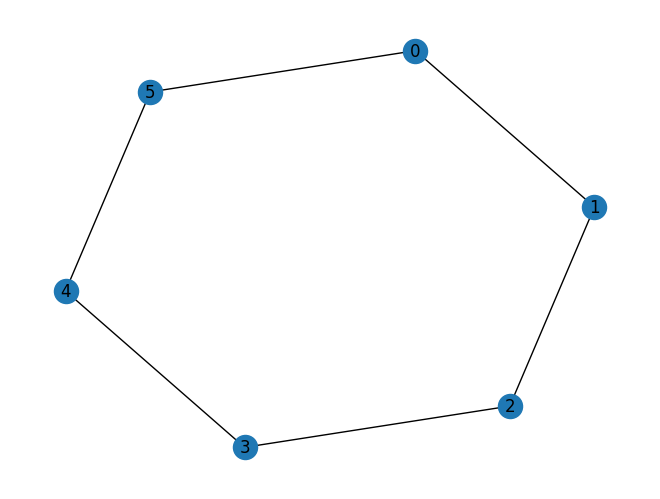

In [86]:
G1 = nx.cycle_graph(6)
G2 = nx.wheel_graph(7)
    
nx.draw(G1, with_labels = True)

7.0

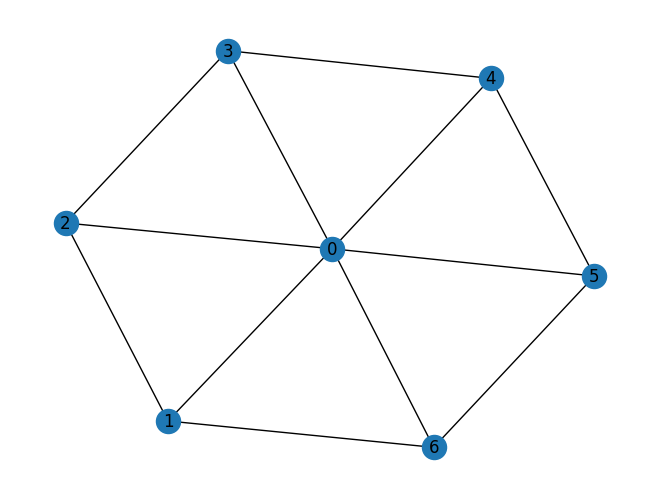

In [87]:
nx.draw(G2, with_labels = True)

nx.graph_edit_distance(G1, G2)

### 2. Degree sequence

Degree sequence [2, 2, 2, 2]
Degree histogram


{2: 4}

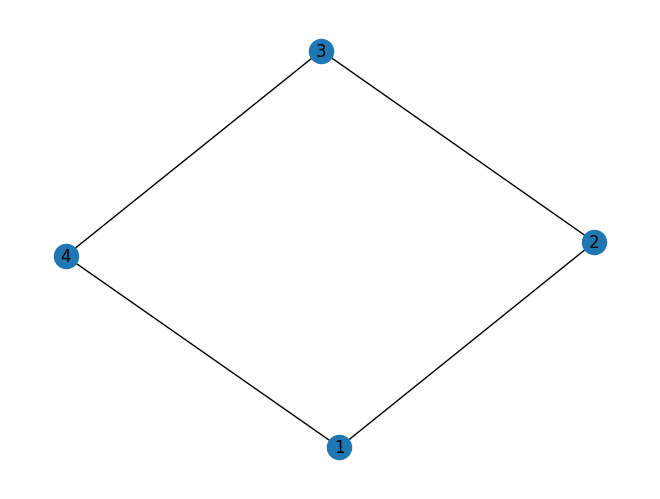

In [88]:
import networkx as nx
G1 = nx.Graph()
edges = [(1, 2), (2, 3), (3, 4),(4, 1)]
G1.add_edges_from(edges)
nx.draw(G1, with_labels = True)

degree_sequence = [d for n, d in G1.degree()]  # degree sequence
print(f"Degree sequence {degree_sequence}")
print("Degree histogram")
hist = {}
for d in degree_sequence:
    if d in hist:
        hist[d] += 1
    else:
        hist[d] = 1
#print("degree #nodes")
#for d in hist:
#    print(f"{d:4} {hist[d]:6}")

myKeys = list(hist.keys())
myKeys.sort()
sorted_dict1 = {i: hist[i] for i in myKeys}
sorted_dict1

Degree sequence [2, 2, 2, 2]
Degree histogram


{2: 4}

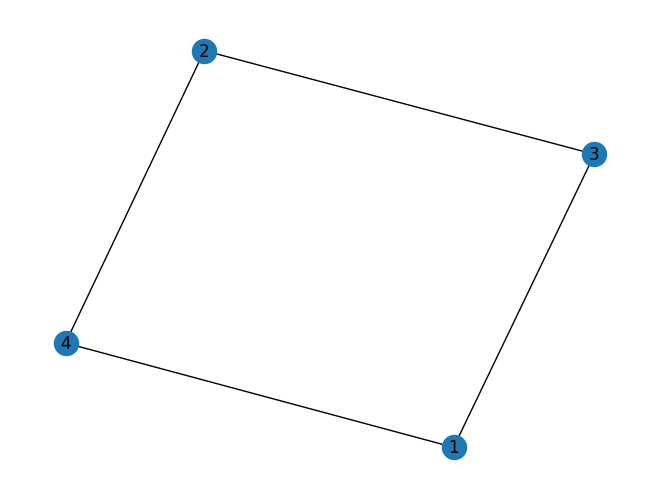

In [89]:

G2 = nx.Graph()
edges = [(1, 3), (1, 4), (2, 3), (2, 4)]
G2.add_edges_from(edges)
nx.draw(G2, with_labels = True)

degree_sequence = [d for n, d in G2.degree()]  # degree sequence
print(f"Degree sequence {degree_sequence}")
print("Degree histogram")
hist = {}
for d in degree_sequence:
    if d in hist:
        hist[d] += 1
    else:
        hist[d] = 1
#print("degree #nodes")
#for d in hist:
#    print(f"{d:4} {hist[d]:6}")

myKeys = list(hist.keys())
myKeys.sort()
sorted_dict2 = {i: hist[i] for i in myKeys}
sorted_dict2

In [90]:
if sorted_dict1 == sorted_dict2:
    print("G1 is equal to G2")

G1 is equal to G2


### 3. Weisfeiler Lehman (WL) graph hash
The function iteratively aggregates and hashes neighbourhoods of each node. After each node’s neighbors are hashed to obtain updated node labels, a hashed histogram of resulting labels is returned as the final hash.

Hashes are identical for isomorphic graphs and strong guarantees that non-isomorphic graphs will get different hashes.

#### 3.1. Initialize graphs

In [91]:
G1 = nx.Graph()
G1.add_edges_from(
    [
        (1, 2, {"label": "A"}),
        (2, 3, {"label": "A"}),
        (3, 1, {"label": "A"}),
        (1, 4, {"label": "B"}),
    ]
)
G1_node_attributes = {
    1: "A",
    2: "B",
    3: "C",
    4: "D",
}
# Set node labels by using node attributes
nx.set_node_attributes(G1, G1_node_attributes, name="label")

G2 = nx.Graph()
G2.add_edges_from(
    [
        (5, 6, {"label": "B"}),
        (6, 7, {"label": "A"}),
        (7, 5, {"label": "A"}),
        (7, 8, {"label": "A"}),
    ]
)
G2_node_attributes = {
    5: "E",
    6: "F",
    7: "G",
    8: "H",
}
# Set node labels by using node attributes
nx.set_node_attributes(G2, G2_node_attributes, name="label")


{1: 'A', 2: 'B', 3: 'C', 4: 'D'}


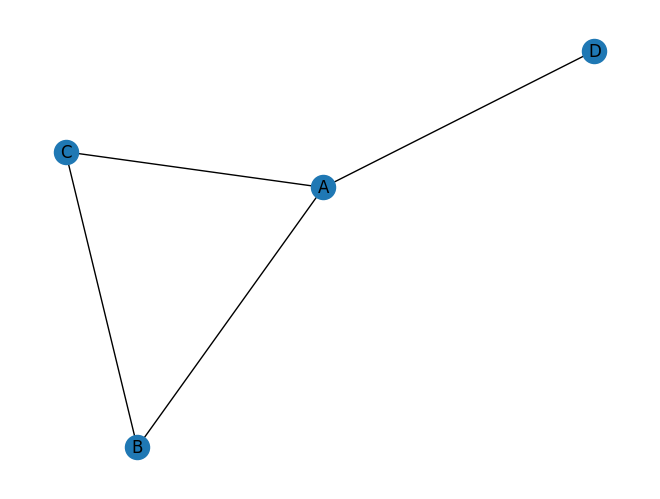

In [92]:
def draw_graph_with_labels(graph):
    labels = dict()
    names = nx.get_node_attributes(graph, 'label')
    print(names)
    for node in graph.nodes:
        labels[node] = f"{names[node]}"
    nx.draw(graph, labels=labels)
    

draw_graph_with_labels(G1)

{5: 'E', 6: 'F', 7: 'G', 8: 'H'}


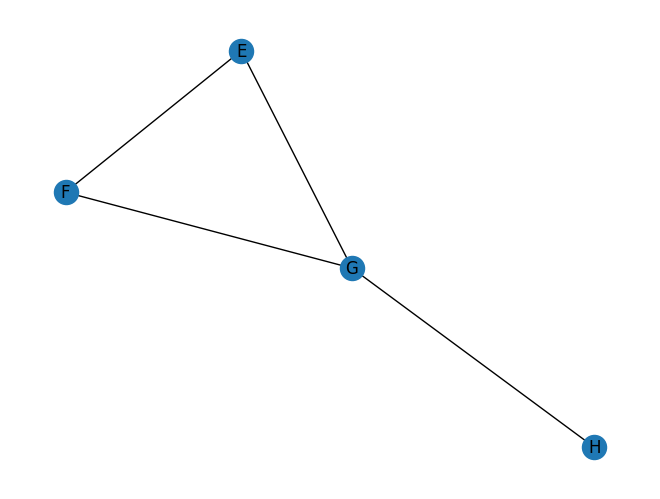

In [93]:
draw_graph_with_labels(G2)

#### 3.2. Without labels

In [94]:
g1_hash = nx.weisfeiler_lehman_graph_hash(G1)
g2_hash = nx.weisfeiler_lehman_graph_hash(G2)

# g1_hash and g2_hash are equal when they are isomorphic
print(f"First  graph hash: {g1_hash}")
print(f"Second graph hash: {g2_hash}")
print(f"Checking graph isomorphic: {g1_hash==g2_hash}")

First  graph hash: 7bc4dde9a09d0b94c5097b219891d81a
Second graph hash: 7bc4dde9a09d0b94c5097b219891d81a
Checking graph isomorphic: True


#### 3.3. With node labels

In [95]:
g1_hash = nx.weisfeiler_lehman_graph_hash(G1, node_attr="label")
g2_hash = nx.weisfeiler_lehman_graph_hash(G2, node_attr="label")

# g1_hash and g2_hash are equal when they are isomorphic
print(f"First  graph hash: {g1_hash}")
print(f"Second graph hash: {g2_hash}")
print(f"Checking graph isomorphic: {g1_hash==g2_hash}")

First  graph hash: abb9c9a6d96be14ce46c54fd8caea3ef
Second graph hash: ce744a670d85f44bb0e504754ef4d70d
Checking graph isomorphic: False


#### 3.4. With edge labels

In [96]:
g1_hash = nx.weisfeiler_lehman_graph_hash(G1, edge_attr="label")
g2_hash = nx.weisfeiler_lehman_graph_hash(G2, edge_attr="label")

# g1_hash and g2_hash are equal when they are isomorphic
print(f"First  graph hash: {g1_hash}")
print(f"Second graph hash: {g2_hash}")
print(f"Checking graph isomorphic: {g1_hash==g2_hash}")

First  graph hash: c653d85538bcf041d88c011f4f905f10
Second graph hash: 3dcd84af1ca855d0eff3c978d88e7ec7
Checking graph isomorphic: False


#### 3.5. WL implementation
It contains different methods to construct the WL-Test and k-WL-Test.

#### 3.5.1. Implement the method to generate the WL-Test
![image info](./data/WL.png)
The set of elements are the nodes of the graph. The initial color is the same for everybody and is only the ‘1’ string, and finally, its neighborhood is only the connected nodes to the node of interest.

In [97]:
# A base function to calculate WL
def compute_base_WL(graph, k, verbose, n_set, initial_colors_func, find_neighbors_func):    
    G, n = n_set(graph)
    colors = initial_colors_func(n)
    old_colors = copy.deepcopy(colors)
    
    for i in range(len(n)):
        for node in n:
            neigh_colors = "".join([colors[i][0] for i in find_neighbors_func(G, n, node)])
            colors[node].extend([neigh_colors])
            colors[node].sort()
            
        # Update with the hash
        colors = {i: [hashlib.sha224("".join(colors[i]).encode('utf-8')).hexdigest()] for i in colors}
        
        if list(Counter([item for sublist in colors.values() for item in sublist]).values()) == list(Counter([item for sublist in old_colors.values() for item in sublist]).values()) and i != 0:
            if verbose:
                print(f'Converged at iteration {i}!')
            break
        
        old_colors = copy.deepcopy(colors)
    canonical_form = sorted(Counter([item for sublist in colors.values() for item in sublist]).items())
    
    if verbose:
        print(f'Canonical Form Found: \n {canonical_form} \n')
        
    return canonical_form


In [98]:
def WL(G, k=2, verbose=False):
    # The function to generate the graph with set of nodes in integer labels
    def n_set(G):
        G = nx.convert_node_labels_to_integers(G)
        return G, list(G.nodes())
    
    # The function to initialize colors for nodes
    def set_initial_colors(n):
        return {i: [hashlib.sha224("1".encode('utf-8')).hexdigest()] for i in n}
    
    # The function to check neighbors of a node
    def find_neighbors(G, n, node):
        return G.neighbors(node)
    
    # Compute WL test
    return compute_base_WL(G, k, verbose, n_set, set_initial_colors, find_neighbors)


#### 3.5.2. Compute k-WL
The k-dimensional Weisfeiler Lehman test extends the test to coloring k-tuples of nodes.
![image info](./data/kWL.png)

#### The differences from the WL-Test:

- The set of elements is based on V^k and not on V anymore.

- The initial color is not the same for every node, now it depends on the nodes that compose the element
- The neighborhood of each element is defined according to bellow equation.
![image info](./data/kWL_eq.png)

In [99]:
def kWL(G, k, verbose=False):
    def n_set(G):
        G = nx.convert_node_labels_to_integers(G)
        V = list(G.nodes())
        
        # Considering node with k-tuples of nodes
        V_k = [comb for comb in itertools.combinations(V, k)]
        return G, V_k

    def set_initial_colors(n):
        return {i: [hashlib.sha224(str(i).encode('utf-8')).hexdigest()] for i in n}

    # Find k-hop neighbors
    def find_neighbors(G, V_k, node):
        return [n for n in V_k if len(set(n) - set(V_k[V_k.index(node)])) == 1]

    return compute_base_WL(G, k, verbose, n_set, set_initial_colors, find_neighbors)

In [100]:
def check_graph_isomorphic(G1, G2, method='WL', k=2, verbose=False):
    methods = {
        'WL': WL,
        'kWL': kWL
    }

    # If two graphs have different numbers of nodes they cannot be isomorphic
    if len(G1.nodes()) != len(G2.nodes()):
        if verbose:
            print('Non-Isomorphic by different number of nodes!')
        return False
    
    g1_hash = methods[method](G1, k, verbose)
    g2_hash = methods[method](G2, k, verbose)

    print(f"Checking graph isomorphic: {g1_hash==g2_hash}")
    return g1_hash == g2_hash

#### 3.5.3. Test WL
Comparing the graph on the left L and the graph on the right R
![image info](./data/example_isomorphic.png)

In [101]:
# Create graph L
L = nx.Graph(
    [
        ("a", "g"),
        ("a", "h"),
        ("a", "i"),
        ("g", "b"),
        ("g", "c"),
        ("b", "h"),
        ("b", "j"),
        ("h", "d"),
        ("c", "i"),
        ("c", "j"),
        ("i", "d"),
        ("d", "j"),
    ]
)

# Create graph R
R = nx.Graph(
    [
        (1, 2),
        (1, 5),
        (1, 4),
        (2, 6),
        (2, 3),
        (3, 7),
        (3, 4),
        (4, 8),
        (5, 6),
        (5, 8),
        (6, 7),
        (7, 8),
    ]
)

check_graph_isomorphic(R, L, k=1, verbose=True, method='WL')

Converged at iteration 1!
Canonical Form Found: 
 [('9f43c972c6d21dec7641f34208d88a86d8cd791a839d8ae95cac66e7', 8)] 

Converged at iteration 1!
Canonical Form Found: 
 [('9f43c972c6d21dec7641f34208d88a86d8cd791a839d8ae95cac66e7', 8)] 

Checking graph isomorphic: True


True

##### Test k-WL with k = 3

In [102]:
check_graph_isomorphic(R, L, k=2, verbose=True, method='kWL')

Converged at iteration 1!
Canonical Form Found: 
 [('03cd0379aec8717d03c0431e5963bc6953492d4cf6a15a3e2e9dea45', 1), ('0c6b9ecbf69916fcd99d8aaaeb8919785245647ad294290a81999b0c', 1), ('0fb6a4170702a2f2556f9b2f178ce20dd36b8dc008253f0054bec42b', 1), ('17931a26071743dd0164a4e1fa6c5b2b7427b0494d71d1346f1063a6', 1), ('27d2517f4a598b0ecc8a86c13c4cc7e0c3e1a21f111b1f4750eba680', 1), ('2ab6c5f96589faaafa4e0c6f5b5cfd8ed67044dba6cccdfcb032d785', 1), ('36ea5314d1355aea4bdadbb1fbc4541ce81144a43f92d13d2c2847ba', 1), ('3833b3af52de3ae2dd433c68ba2ae1d8b2f035ab35b300870d56ea12', 1), ('4205be6c27a2b9584d1ca133393d0893804f5416a9b557863edf80c9', 1), ('492031c674a1b333800d6ba4a33e4bf0029c591a66a7469251e62e0f', 1), ('4f52e044162c6c06a19acbf86457b170526991a6777a86995d7c1412', 1), ('5443c3d2dffd6e9f500591d82a018a4d4173e426c09fe9b85ca17347', 1), ('5ddecb48972d7bb3a16ccca24aeb38057b7ba0beefed39beee424ca2', 1), ('70bffeed5d01986b673191d61a3186c559277fca5641d31617d47a82', 1), ('71b8ad49e4177385565afb91e77218120482d

True

#### 3.6. Using grakel library


In [103]:
G1 = nx.path_graph(3)
nx.set_node_attributes(G1, {0:'a', 1:'b', 2:'c'}, 'label')

G2 = nx.path_graph(3)
nx.set_node_attributes(G2, {0:'a', 1:'a', 2:'b'}, 'label')

nx_graphs = [G1, G2]

graphs = graph_from_networkx(nx_graphs, node_labels_tag='label')

gk = GraphKernel(kernel=[{"name": "weisfeiler_lehman", "n_iter": 3}], normalize=True)
K = gk.fit_transform(graphs)

print(K)

[[1.         0.23145502]
 [0.23145502 1.        ]]


{0: 'a', 1: 'b', 2: 'c'}


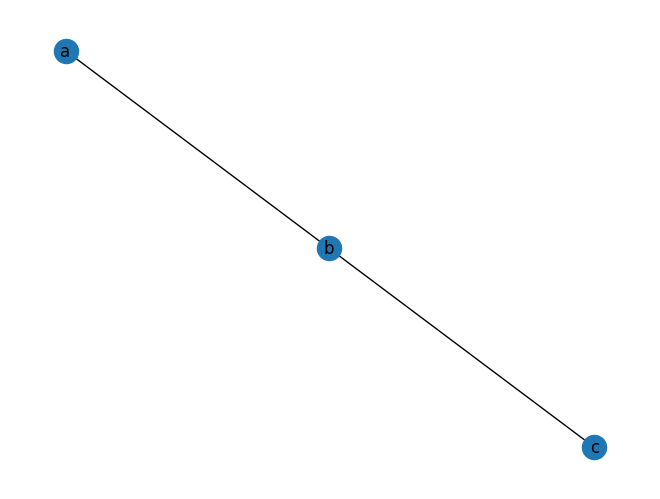

In [104]:
draw_graph_with_labels(G1)

{0: 'a', 1: 'a', 2: 'b'}


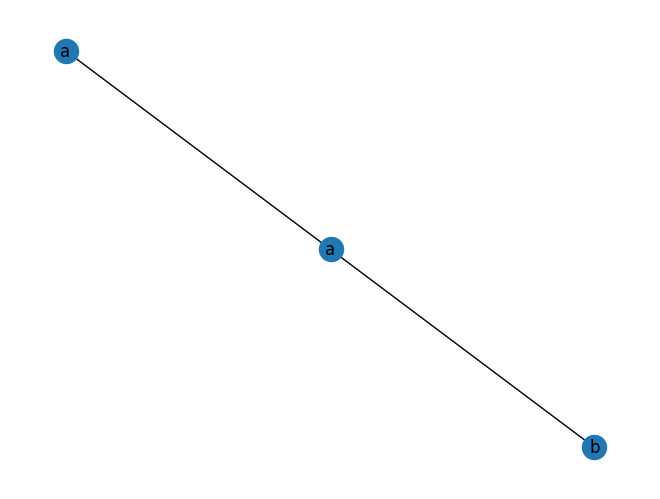

In [105]:
draw_graph_with_labels(G2)

### 4. Shortest path kernel and WL subtree kernel
Compute the two kernels: the shortest path kernel and the WL subtree kernel.

In [106]:
!pip install grakel
from grakel.utils import graph_from_networkx
from grakel import GraphKernel


G1 = nx.path_graph(3)
nx.set_node_attributes(G1, {0:'a', 1:'b', 2:'c'}, 'label')

G2 = nx.path_graph(3)
nx.set_node_attributes(G2, {0:'c', 1:'b', 2:'a'}, 'label')

nx_graphs = [G1, G2]

graphs = graph_from_networkx(nx_graphs, node_labels_tag='label')

gk = GraphKernel(kernel=[{"name": "shortest_path"}], normalize=True)
K = gk.fit_transform(graphs)

print(K)

[[1. 1.]
 [1. 1.]]


In [107]:
G1 = nx.path_graph(3)
nx.set_node_attributes(G1, {0:'a', 1:'b', 2:'c'}, 'label')

G2 = nx.path_graph(3)
nx.set_node_attributes(G2, {0:'a', 1:'a', 2:'b'}, 'label')

nx_graphs = [G1, G2]

graphs = graph_from_networkx(nx_graphs, node_labels_tag='label')

gk = GraphKernel(kernel=[{"name": "shortest_path"}], normalize=True)
K = gk.fit_transform(graphs)

print(K)

[[1.         0.28867513]
 [0.28867513 1.        ]]


In [108]:
G1 = nx.path_graph(3)
nx.set_node_attributes(G1, {0:'a', 1:'b', 2:'c'}, 'label')

G2 = nx.path_graph(3)
nx.set_node_attributes(G2, {0:'a', 1:'a', 2:'b'}, 'label')

nx_graphs = [G1, G2]

graphs = graph_from_networkx(nx_graphs, node_labels_tag='label')

graphlet_kernel = GraphKernel(kernel=[{"name": "graphlet_sampling", "sampling": {"n_samples":100}}], normalize=True)
K = graphlet_kernel.fit_transform(graphs)
print(K)

[[1. 1.]
 [1. 1.]]


### 5. Pyramid match graph kernel: 
Embeds the vertices of the input graphs in a vector space. 
It then partitions the feature space into regions of increasingly larger size and takes a weighted sum of the matches that occur at each level.

In [109]:
G1 = nx.path_graph(3)
nx.set_node_attributes(G1, {0:'a', 1:'b', 2:'c'}, 'label')

G2 = nx.path_graph(3)
nx.set_node_attributes(G2, {0:'a', 1:'a', 2:'b'}, 'label')

nx_graphs = [G1, G2]

graphs = graph_from_networkx(nx_graphs, node_labels_tag='label')

gk = GraphKernel(kernel=[{"name": "pyramid_match"}], normalize=True)
K = gk.fit_transform(graphs)

print(K)

[[1.         0.47407407]
 [0.47407407 1.        ]]


### 6. VF2 
An implementation of VF2 algorithm for graph isomorphism testing.
#### 6.1. Undirected graph

In [110]:
# Generate 2 graphs
G1 = nx.Graph()
G2 = nx.Graph()

G1.add_nodes_from(range(0,9))
G2.add_nodes_from(range(0,9))
G1.add_edges_from([(0,1), (1,2), (2,3), (3,4), (2,5), (5,6), (6, 8), (6, 9), (7, 9)])
G2.add_edges_from([(0,1), (1,4), (2,4), (2,6), (4,3), (3,5), (5, 9), (5, 8), (7, 8)])

# Mapping 2 graph G1 and G2
GM = isomorphism.GraphMatcher(G2,G1)
print(f" Checking graph isomorphic: {GM.is_isomorphic()}")
GM.mapping

 Checking graph isomorphic: True


{0: 0, 1: 1, 4: 2, 2: 3, 6: 4, 3: 5, 5: 6, 9: 8, 8: 9, 7: 7}

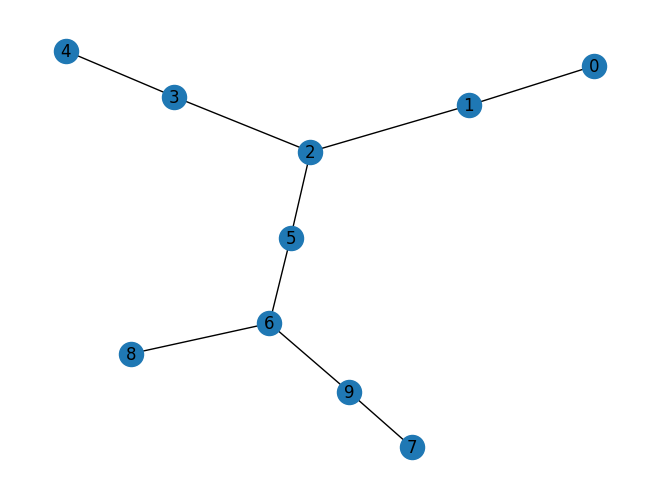

In [111]:
nx.draw(G1, with_labels = True)

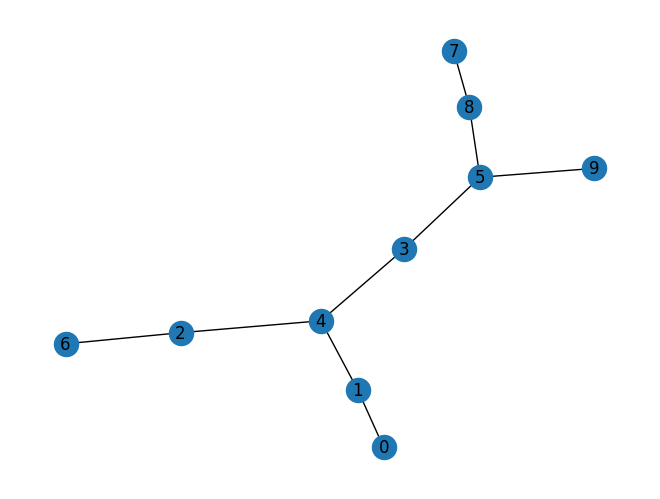

In [112]:
nx.draw(G2, with_labels = True)

#### 6.2. Directed graph

In [113]:
# Generate 2 directed graphs
G1 = nx.DiGraph()
G2 = nx.DiGraph()

G1.add_nodes_from(range(0,9))
G2.add_nodes_from(range(0,9))
G1.add_edges_from([(0,1), (1,2), (2,3), (3,4), (2,5), (5,6), (6, 8), (6, 9), (7, 9)])
G2.add_edges_from([(0,1), (1,4), (2,4), (2,6), (4,3), (3,5), (5, 9), (5, 8), (7, 8)])

# Mapping 2 graph G1 and G2
GM = isomorphism.GraphMatcher(G2,G1)
print(f" Checking graph isomorphic: {GM.is_isomorphic()}")
GM.mapping

 Checking graph isomorphic: False


{}

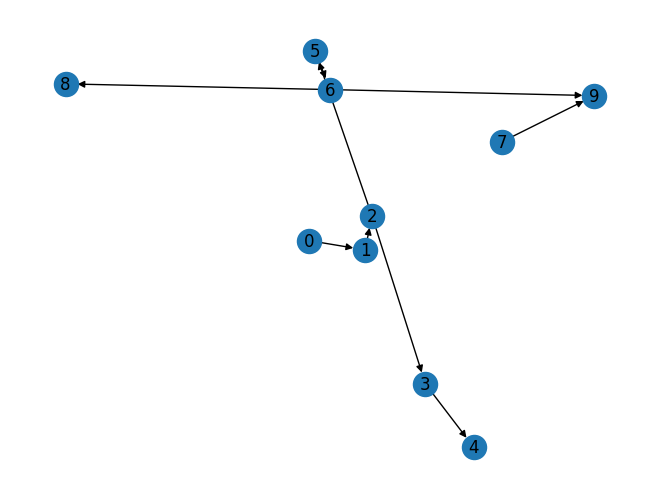

In [114]:
nx.draw(G1, with_labels = True)

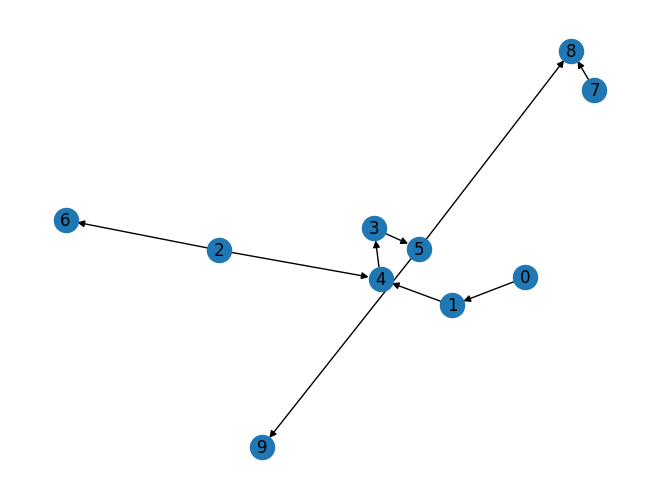

In [115]:
nx.draw(G2, with_labels = True)

#### 6.3. Update the mismatch edge

In [116]:
# Generate 2 directed graphs
G1 = nx.DiGraph()
G2 = nx.DiGraph()

G1.add_nodes_from(range(0,9))
G2.add_nodes_from(range(0,9))
# Change graph edges
G1.add_edges_from([(0,1), (1,2), (2,3), (3,4), (2,5), (5,6), (6, 8), (6, 9), (7, 9)])
G2.add_edges_from([(0,1), (1,4), (4,2), (2,6), (4,3), (3,5), (5, 9), (5, 8), (7, 8)])

# Mapping 2 graph G1 and G2
GM = isomorphism.GraphMatcher(G2,G1)
print(f" Checking graph isomorphic: {GM.is_isomorphic()}")
GM.mapping

 Checking graph isomorphic: True


{0: 0, 1: 1, 4: 2, 2: 3, 6: 4, 3: 5, 5: 6, 9: 8, 8: 9, 7: 7}

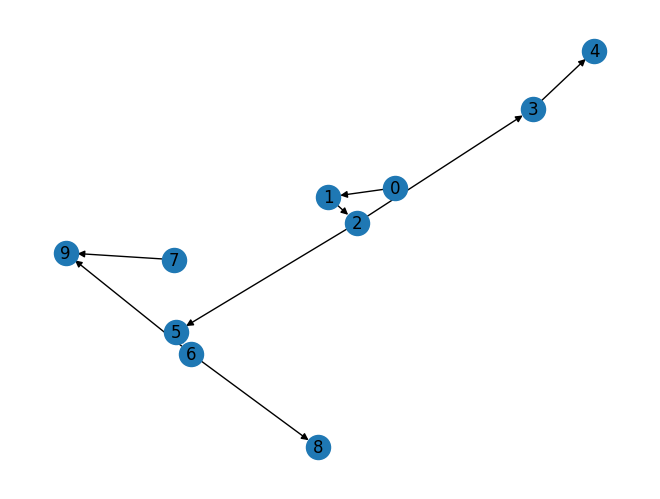

In [117]:
nx.draw(G1, with_labels = True)

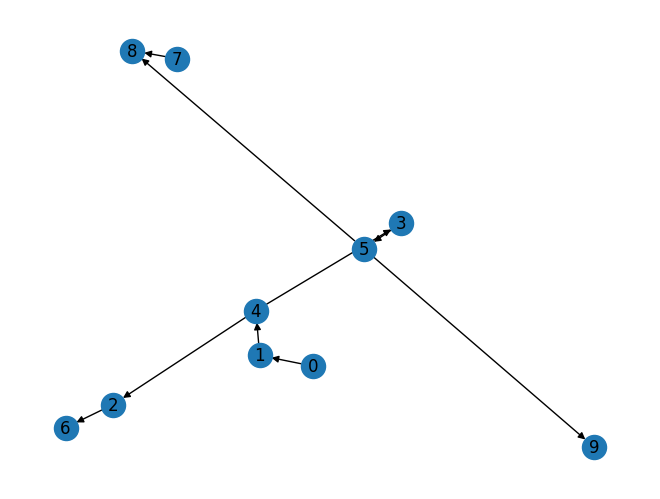

In [118]:
nx.draw(G2, with_labels = True)